In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models 
import potential_sweeps as sweep
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 0.1
ion_diameter_m = 10e-10
solvent_diameter_m = 2.75e-10
potentials = np.linspace(-0.75, 0.75, 100)

In [3]:
gc_asol = sweep.gouy_chapman(ion_concentration_molar, potentials)
borukhov_asol = sweep.borukhov(ion_concentration_molar, ion_diameter_m, potentials)

In [4]:
gc = models.GouyChapman(ion_concentration_molar)
gc_nsol = sweep.numerical(gc, potentials, force_recalculation=False)

In [5]:
borukhov = models.Borukhov(ion_concentration_molar, ion_diameter_m)
borukhov_nsol = sweep.numerical(borukhov, potentials, force_recalculation=False)

In [6]:
abrashkin = models.Abrashkin(ion_concentration_molar, ion_diameter_m, eps_r_opt=1)
abrashkin_nsol = sweep.numerical(abrashkin, potentials, force_recalculation=False)

In [7]:
huangsimple = models.HuangSimple(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=2)
huangsimple_nsol = sweep.numerical(huangsimple, potentials, force_recalculation=True)

In [8]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, solvent_diameter_m, eps_r_opt=1)
huang_nsol = sweep.numerical(huang, potentials, force_recalculation=True)

79.84747136781964
0.18323237625000022


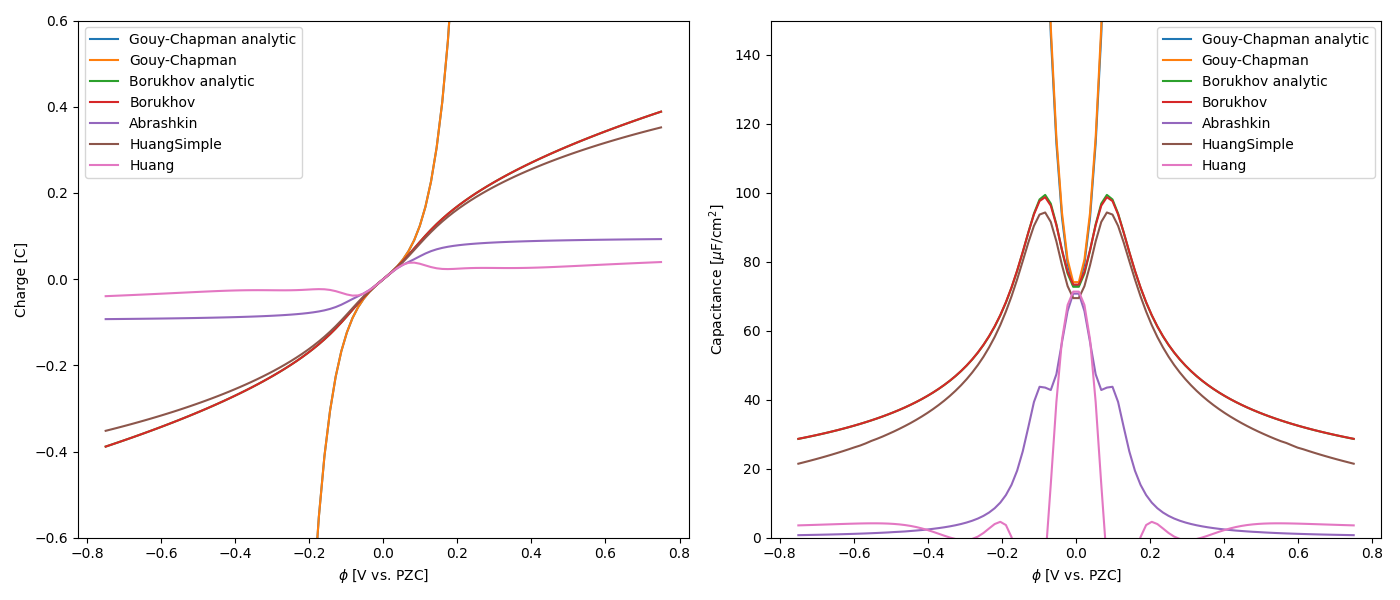

In [9]:
fig, ax = plotting.plot_potential_sweep([gc_asol, gc_nsol, borukhov_asol, borukhov_nsol, abrashkin_nsol, huangsimple_nsol, huang_nsol])

plt.show()